# 분류모델 1. 결정트리

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
# 붓꽃 데이터 불러오기
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

X.shape, y.shape

((150, 4), (150,))

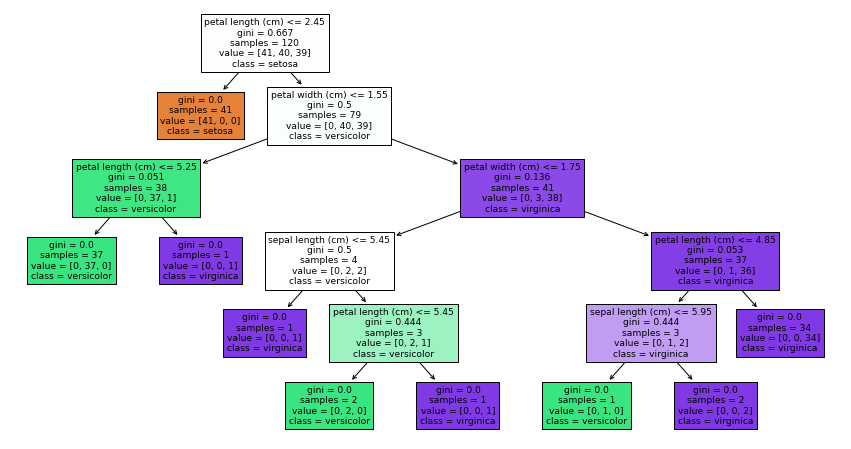

[0.02500521 0.         0.55490281 0.42009198]


In [24]:
# 분류 학습
dt_clf = DecisionTreeClassifier(random_state = 156)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

# 학습
dt_clf.fit(X_train, y_train)

# 분류된 노드 시각화
# 방법1: graphviz 활용 -> 내 노트북에서는 잘 안됨,,
export_graphviz(dt_clf, 
                out_file = 'tree.dot',   # 파일 이름 생성
                class_names = iris_data.target_names,
                feature_names = iris_data.feature_names,
                impurity = True,  # 균일도(혼잡도)
                filled = True)

# 방법2: matplotlib 활용
plt.figure(figsize = (15,8))
tree.plot_tree(dt_clf,
              class_names = iris_data.target_names,
              feature_names = iris_data.feature_names,
              filled = True)
plt.show()

print(dt_clf.feature_importances_)

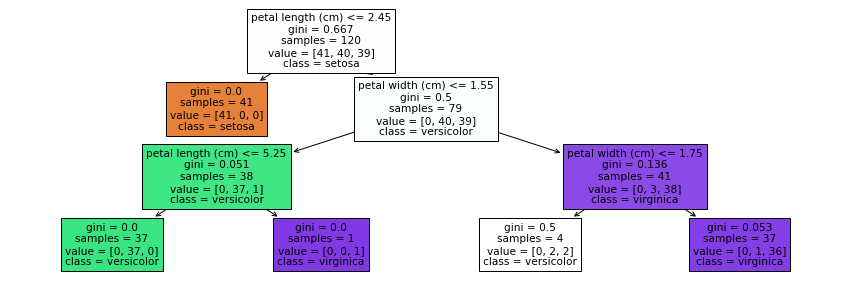

[0.         0.         0.55810743 0.44189257]


In [30]:
dt_clf2 = DecisionTreeClassifier(random_state = 156,  max_depth = 3)
dt_clf2.fit(X_train, y_train)

plt.figure(figsize = (15, 5))
tree.plot_tree(dt_clf2,
               feature_names = iris_data.feature_names,
               class_names = iris_data.target_names,
               filled = True)
plt.show()

print(dt_clf2.feature_importances_)

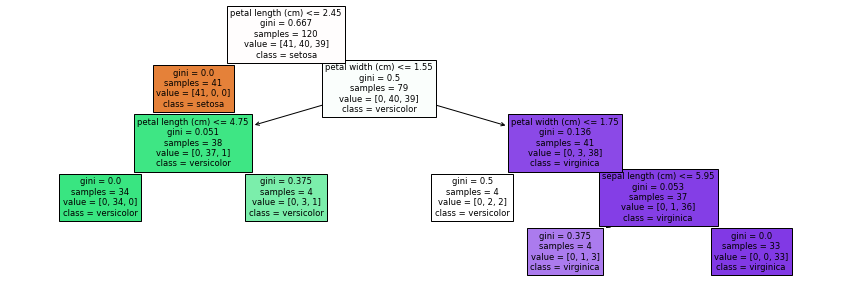

[0.00594727 0.         0.5459484  0.44810433]


In [31]:
dt_clf3 = DecisionTreeClassifier(random_state = 156, min_samples_leaf = 4)
dt_clf3.fit(X_train, y_train)

plt.figure(figsize = (15,5))
tree.plot_tree(dt_clf3,
               class_names = iris_data.target_names,
               feature_names = iris_data.feature_names,
               filled = True)
plt.show()

print(dt_clf3.feature_importances_)

In [29]:
import seaborn as sns
import numpy as np
%matplotlib inline

<AxesSubplot:>

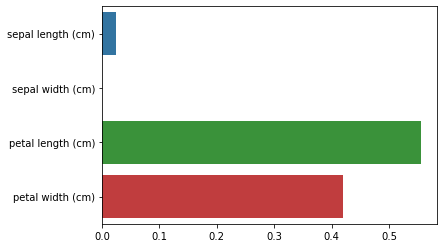

In [33]:
# 피처중요도 추출

sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

## 결정트리 과적합

In [36]:
from sklearn.datasets import make_classification
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

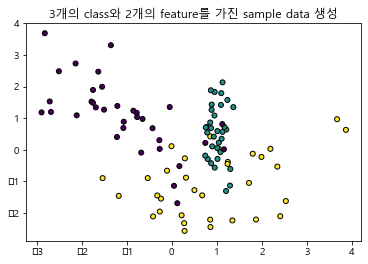

In [43]:
mpl.rc('font', family = 'Malgun Gothic')
plt.title('3개의 class와 2개의 feature를 가진 sample data 생성')

# 샘플데이터 생성
X_features, y_labels = make_classification(n_features = 2,   # 피처개수 2개
                                           n_redundant = 0,   # 독립변수 중 다른 독립변수의 선형 조합으로 나타나는 성분의 수
                                           n_informative = 2,  # 독립변수 중 종속변수와 상관관계가 있는 성분의 수
                                           n_classes = 3,    # 레이블 개수 3개
                                           n_clusters_per_class = 1,  # 클래스 당 클러스터의 수
                                           random_state = 0)
plt.scatter(X_features[:, 0], 
            X_features[: , 1], 
            c = y_labels, 
            marker = 'o', 
            s = 25,    # marker 크기 지정
            edgecolor = 'k')  # marker 테두리 색

In [46]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], 
               c=y, s=25, 
               cmap='rainbow', 
               edgecolor='k', 
               clim=(y.min(), y.max()), 
               zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 
    model.fit(X, y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), 
                         np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha = 0.3,
                           levels = np.arange(n_classes + 1) - 0.5,
                           cmap = 'rainbow', 
                           clim = (y.min(), y.max()),
                           zorder = 1)

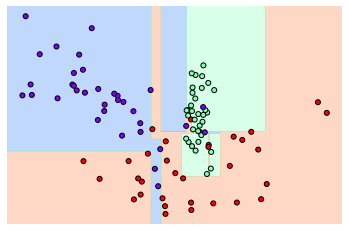

In [47]:
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

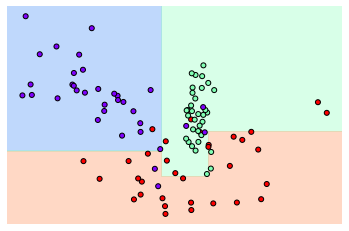

In [48]:
dt_clf2 = DecisionTreeClassifier(random_state = 156, min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf2, X_features, y_labels)

## 실습: 사용자 행동 인식 데이터 세트

In [49]:
import pandas as pd
import numpy as np

In [94]:
feature_name_df = pd.read_csv('./필요데이터/human_activity/features.txt', 
                              sep = '\s+',
                              header = None,
                              names = ['columns_index', 'column_name'])
display(feature_name_df.head())


feature_names = feature_name_df.iloc[:, 1].tolist()

print(feature_names[:10])

,columns_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [98]:
# 중복된 피처명 변경
print(len(feature_names), len(set(feature_names)))

new_feature_names = []
for i in range(len(feature_names)):
    cnt = feature_names[:i].count(feature_names[i])
    all_cnt = feature_names.count(feature_names[i])
    new_name = feature_names[i]
    if all_cnt > 1:
        new_name += '_' + str(cnt + 1)
    new_feature_names.append(new_name)
    
print(len(new_feature_names), len(set(new_feature_names)))

feature_name_df.iloc[:, 1] = new_feature_names

feature_name_df.head()

561 477
561 561


,columns_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [99]:
# train, test 데이터셋을 불러오는 사용자함수 생성

def get_human_dataset():
    # 컬럼명 생성
    feature_name_df = pd.read_csv('./필요데이터/human_activity/features.txt', 
                              sep = '\s+',
                              header = None,
                              names = ['columns_index', 'column_name'])
    feature_names = feature_name_df.iloc[:, 1].tolist()
    
    new_feature_names = []
    for i in range(len(feature_names)):
        cnt = feature_names[:i].count(feature_names[i])
        all_cnt = feature_names.count(feature_names[i])
        new_name = feature_names[i]
        if all_cnt > 1:
            new_name += '_' + str(cnt + 1)
        new_feature_names.append(new_name)

    # train, test 피처 데이터 불러오기
    X_train = pd.read_csv('./필요데이터/human_activity/train/X_train.txt', sep = '\s+', names = new_feature_names)
    X_test = pd.read_csv('./필요데이터/human_activity/test/X_test.txt', sep = '\s+', names = new_feature_names)
    
    # train, test 레이블 데이터 불러오기
    y_train = pd.read_csv('./필요데이터/human_activity/train/y_train.txt', sep = '\s+', names = ['action'])
    y_test = pd.read_csv('./필요데이터/human_activity/test/y_test.txt', sep = '\s+', names = ['action'])
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [104]:
X_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [106]:
y_train.value_counts(), y_test.value_counts()

(action
 6         1407
 5         1374
 4         1286
 1         1226
 2         1073
 3          986
 dtype: int64,
 action
 6         537
 5         532
 1         496
 4         491
 2         471
 3         420
 dtype: int64)

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [112]:
# 동작 예측 모델링
dt_clf = DecisionTreeClassifier(random_state = 111)

# 학습
dt_clf.fit(X_train, y_train)

# 예측
pred = dt_clf.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, pred)
print(f'정확도: {accuracy:.4f}')

정확도: 0.8487


In [111]:
# 기본 하이퍼 파라미터 추출
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 111,
 'splitter': 'best'}

In [113]:
from sklearn.model_selection import GridSearchCV

In [118]:
# 하이퍼 파라미터 튜닝
## 트리 깊이 튜닝

params = {
    'max_depth': [6, 8, 10, 12, 14, 16, 20, 24],
    'min_samples_split': [10, 16, 20]
}

grid_cv = GridSearchCV(dt_clf,
                       param_grid = params,  # 튜닝할 파라미터들 딕셔너리
                       scoring = 'accuracy',  # 평가 지표
                       cv = 5,   # 교차검증할 세트 개수
                       verbose = 1)  # 과정 print
# 학습
grid_cv.fit(X_train, y_train)

# 하이퍼파라미터의 베스트 평가 결과 출력
print(f'best accuracy: {grid_cv.best_score_}')
print(f'best params: {grid_cv.best_params_}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  7.9min finished


best accuracy: 0.8544701415576428
best params: {'max_depth': 8, 'min_samples_split': 16}


In [140]:
print(grid_cv.best_estimator_)

DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=111)


In [121]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'param_min_samples_split', 'mean_test_score']]

,param_max_depth,param_min_samples_split,mean_test_score
0,6,10,0.843718
1,6,16,0.844125
2,6,20,0.843989
3,8,10,0.849573
4,8,16,0.854470
5,8,20,0.849164
6,10,10,0.846582
7,10,16,0.847126
8,10,20,0.851343
9,12,10,0.838694


In [123]:
# 하이퍼파라미터 튜닝된 인자들을 가지고 모델링
best_df_clf = grid_cv.best_estimator_
print(best_df_clf)

# 예측 
pred1 = best_df_clf.predict(X_test)
print(pred1)

# 평가
accuracy = accuracy_score(y_test, pred1)
print(accuracy)

DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=111)
[5 5 5 ... 2 1 2]
0.8717339667458432


In [135]:
import seaborn as sns

,Feature Importance
tGravityAcc-min()-X,0.253354
fBodyAcc-mad()-X,0.212584
"angle(Y,gravityMean)",0.143037
fBodyAccMag-energy(),0.115478
"tGravityAcc-arCoeff()-Z,2",0.101548
fBodyGyro-maxInds-X,0.023971
"tBodyGyro-correlation()-Y,Z",0.016513
tGravityAcc-energy()-Y,0.016433
tGravityAccMag-arCoeff()1,0.015741
fBodyAcc-max()-Y,0.008825


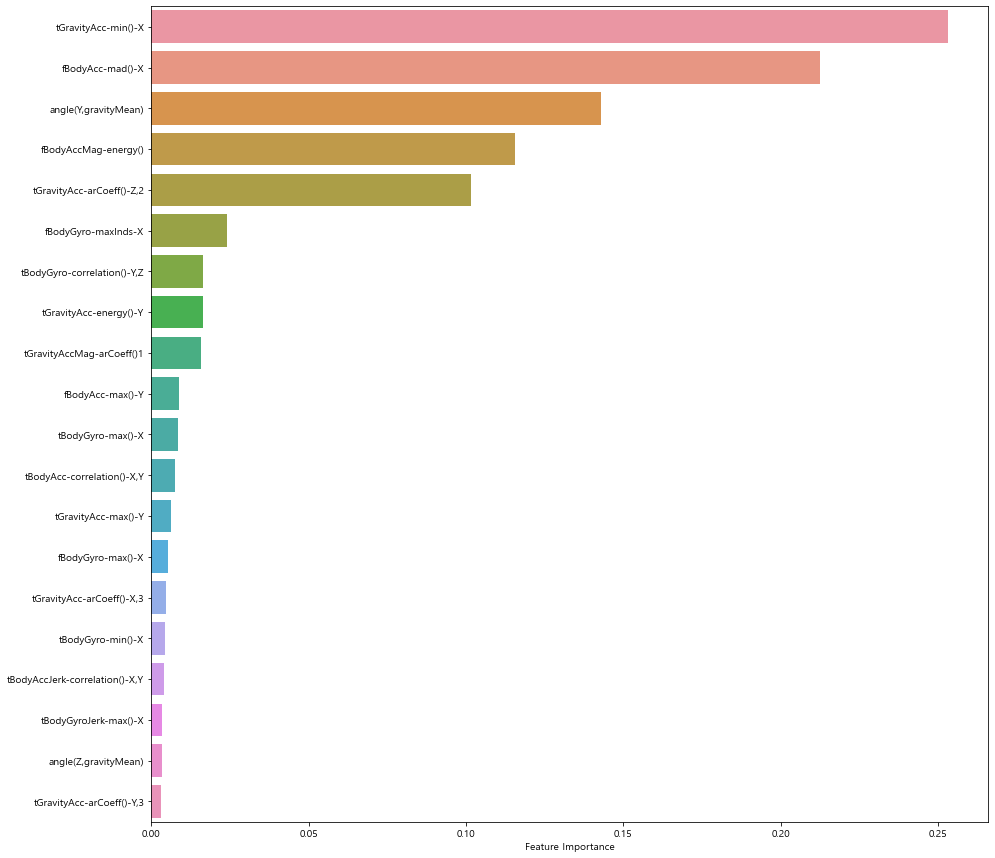

In [137]:
# 피처 중요도 확인 및 시각화
f_importances = best_df_clf.feature_importances_

f_im_df = pd.DataFrame(f_importances, columns = ['Feature Importance'], index = X_train.columns)

top_20 = f_im_df.sort_values('Feature Importance', ascending = False)[:20]
display(top_20)

plt.figure(figsize = (15,15))
sns.barplot(x = top_20['Feature Importance'], y = top_20.index)
plt.show()